In [ ]:
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, Lambda, MaxPooling2D
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
import nltk
import warnings
import pandas as pd
import os
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import numpy as np
from imblearn.over_sampling import SMOTE
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical

In [ ]:
X= pd.read_csv("Train_supervised.csv")
df_X_train = pd.DataFrame(X)
print(df_X_train)

X= X.iloc[: , :-1]
X= X.iloc[: , :-1]
X = X.iloc[: , 1:]

ans = input("Enter number 1 for info-symatrical: ")
if(ans == '1'):
  X = X.drop('overlaping_words', axis=1)
  X = X.drop('adjectives', axis=1)
  X = X.drop('punc', axis=1)
  X = X.drop('verb', axis=1)
else:
  X = X.drop('overlaping_words', axis=1)
  X = X.drop('adjectives', axis=1)
  X = X.drop('position', axis=1)
  X = X.drop('verb', axis=1)


print(X.head())
print(X.shape)

                                               sentence  punc   numbers  \
0     محترمہ فاطمہ جناح ۳۴ جولائی ۱۸۹۳ء کو کراچی میں...   0.0  0.103448   
1      وہ قائداعظم محمد علی جناح سے قریباً ۷ سال چھو...   0.0  0.018519   
2      محترمہ فاطمہ جناح ابھی چھوٹی ہی تھیں کہ ان کی...   0.0  0.000000   
3      ۸ برس کی عمر میں باپ کا سایہ بھی سر سے اُٹھ گیا    0.0  0.020408   
4      ان دونوں قائداعظم محمد علی جناح بمبئی میں وکا...   0.0  0.000000   
...                                                 ...   ...       ...   
4783                ایک بیوہ اور اس کا ایک لڑکا بھی ہے    0.0  0.000000   
4784                                  شہر میں پڑھتا ہے    0.0  0.000000   
4785                     باجی بےچاری بڑی سیدھی عورت ہے    0.0  0.000000   
4786   ہمارے ہاں کے سارے کپڑے یہی سیتی ہے لیکن سچ ما...   0.0  0.000000   
4787     لڑکی سورج کے رخ پر کھڑی برقعے کو گھور رہی تھی    0.0  0.000000   

        spaces  characters  stopwords  position  order      noun  preposition  \
0     0.189655    

In [ ]:
Y = pd.read_csv("Train_supervised.csv")

Y= Y.iloc[: , :-1]
Y= Y.iloc[: , -1:]
print(Y.head())
print(Y.shape)

   selection
0          1
1          0
2          0
3          1
4          1
(4788, 1)


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 1)
X, Y = sm.fit_resample(X, Y)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,Y)


GaussianNB()

In [ ]:
X_test = pd.read_csv("Test_supervised.csv")
df_X_test = pd.DataFrame(X_test)  #whole dataframe of test


X_test= X_test.iloc[: , :-1]
X_test= X_test.iloc[: , :-1]
X_test = X_test.iloc[: , 1:]

if(ans == '1'):
  X_test = X_test.drop('overlaping_words', axis=1)
  X_test = X_test.drop('adjectives', axis=1)
  X_test = X_test.drop('punc', axis=1)
  X_test = X_test.drop('verb', axis=1)
else:
  X_test = X_test.drop('overlaping_words', axis=1)
  X_test = X_test.drop('adjectives', axis=1)
  X_test = X_test.drop('position', axis=1)
  X_test = X_test.drop('verb', axis=1)
  qq=10



print(X_test.head())
print(X_test.shape)

   numbers    spaces  characters  stopwords  position  order      noun  \
0      0.0  0.236364    0.433071   0.500000  0.007874      1  0.000000   
1      0.0  0.241935    0.976378   0.516129  0.015748      2  0.032258   
2      0.0  0.254902    1.204724   0.675000  0.023622      3  0.025000   
3      0.0  0.233333    0.944882   0.517241  0.031496      4  0.000000   
4      0.0  0.246377    0.543307   0.555556  0.039370      5  0.055556   

   preposition  wordratio  unique_words  title_words  
0     0.357143   0.004997     -0.852146     0.142857  
1     0.419355   0.011267     -0.859701     0.000000  
2     0.450000   0.013902     -0.886098     0.000000  
3     0.379310   0.010903     -0.920131     0.000000  
4     0.444444   0.006269     -0.882620     0.000000  
(2965, 11)


In [ ]:
Y_test = pd.read_csv("Test_supervised.csv")

Y_test = Y_test.iloc[: , :-1]
Y_test= Y_test.iloc[: , -1:]
print(Y_test.head())
print(Y_test.shape)

   selection
0          1
1          0
2          0
3          1
4          0
(2965, 1)


In [ ]:
output_test = model.predict(X_test)

In [ ]:
print(output_test)

[0 0 0 ... 0 0 0]


[[2183  191]
 [ 458  133]]
with following features
accuracy is : 
0.7811129848229342
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2374
           1       0.41      0.23      0.29       591

    accuracy                           0.78      2965
   macro avg       0.62      0.57      0.58      2965
weighted avg       0.74      0.78      0.76      2965

with following features


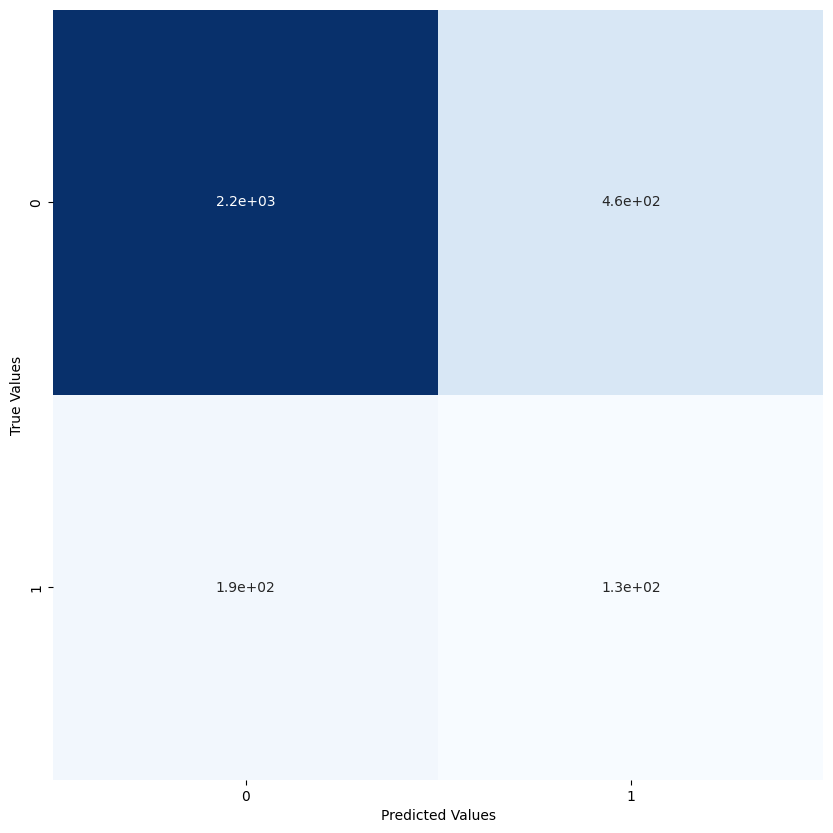

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
fig = plt.figure(figsize=(10, 10))



mt = confusion_matrix(Y_test, output_test)

print(mt)

print("with following features")

accc = accuracy_score(Y_test, output_test)
print("accuracy is : ")
print(accc)

print(classification_report(Y_test, output_test))

print("with following features")

sns.heatmap(mt.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();


In [ ]:
df_X_test['predicted'] = output_test

In [ ]:
count_out = 63
predicted_summaries = []
while (count_out <=89):
    count = 0
    count_in = 0
    str_text = ''
    while (count_in <=2964):
        if(df_X_test['document_number'][count_in] == count_out and df_X_test['predicted'][count_in] == 1):
          str_text = str_text + ' ' + df_X_test['sentence'][count_in]
          print(count_out)
          count = count + 1
        count_in = count_in + 1
    print(count)
    print(str_text)
    predicted_summaries.append(str_text)
    count_out = count_out + 1

0

64
1
  جب اعلیٰ حضرت حضور نظام کو اورنگ آباد کی خوشگوار آب و ہوا میں باغ لگانے کا خیال ہوا تو یہ کام ڈاکٹر سید سراج احسن ( نواب سراج یار جنگ بہادر ) ناظم تعلیمات کو تفویض ہوا 
65
65
65
65
65
65
65
65
65
65
65
11
  باتوں باتوں میں انھوں نے بتایا کہ علامہ اقبال کے دیرینہ اور وفادار ملازم علی بخش کو حکومت نے اس کی خدمات کے سلسلے میں لائل پور میں ایک مربع زمین عطا کی ہے   خواجہ صاحب نے فرمایا : جھنگ ، لائل پور کے بالکل قریب ہے کیا تم علی بخش کی کچھ نہیں کر سکتے   خواجہ صاحب مجھے جاوید منزل لے گئے اور علی بخش سے میرا تعارف کراتے ہوئے کہا  : یہ جھنگ کے ڈپٹی کمشنر ہیں   جب وہ میرے ساتھ کار میں بیٹھ جاتا ہے تو غالباً اس کے دل میں سب سے بڑا وہم یہ ہے کہ شاید اب میں بھی بہت سے دوسرے لوگوں کی طرح علامہ اقبال کی باتیں پوچھ پوچھ کر اس کا سر کھپاؤں گا لیکن میں نے بھی عزم کر رکھا ہے کہ میں خود علی بخش سے حضرت علامہ کے بارے میں کوئی سوال نہیں کروں گا   میری توقع پوری ہوتی ہے اور تھوڑی سی پریشان کن خاموشی کے بعد علی بخش مجھے یوں گھورنے لگتا ہے کہ یہ عجیب شخص ہے ، جو ڈاکٹر صاحب کی کوئی بات نہیں کرتا 

In [ ]:
count_out = 63
actual_summaries = []
while (count_out <=89):
    count = 0
    count_in = 0
    str_text = ''
    while (count_in <=2964):
        if(df_X_test['document_number'][count_in] == count_out and df_X_test['selection'][count_in] == 1):
          str_text = str_text + ' ' + df_X_test['sentence'][count_in]
          print(count_out)
          count = count + 1
        count_in = count_in + 1
    print(count)
    print(str_text)
    actual_summaries.append(str_text)
    count_out = count_out + 1

63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
28
 اگلے وقتوں کی بات ہے کسی گاؤں میں ایک چغل خور رہتا تھا   دراصل وہ اپنی عادت سے مجبور تھا اور اسی عادت کی وجہ سے اسے اپنی ملازمت سے بھی ہاتھ دھونا پڑے تھے ، چنانچہ وہ بےکار تھا   آخر جب وہ مسلسل ناکامیوں سے تنگ آ گیا اور نوبت واقعی فاقوں تک آ پہنچی تو اس نے دل میں سوچا اس گاؤں کو چھوڑ دینا چاہیے اور کہیں اور چل کر قسمت آزمائی کرنی چاہیے   چنانچہ اس نے تھوڑا بہت ضروری سامان لیا اور گاؤں چھوڑ کر سفر پر روانہ ہو گیا تاکہ کسی دوسرے گاؤں یا شہر میں جا کر محنت مزدوری کرے   چلتے چلاتے وہ ایک اور گاؤں میں جا پہنچا   اس لیے اسے امید تھی کہ یہاں نوکری مل جائے گی ، لہذا وہ ایک کسان کے پاس گیا اور اس سے کہا مجھے آپ اپنی ملازمت میں رکھ لیں   چنانچہ چغل خور کسان کے پاس ملازم ہو گیا   ایک روز کسان حسب معمول اپنے کھیتوں میں گیا ہوا تھا اور گھر میں اس کی بیوی اکیلی تھی   یہ دیکھ کر چغل خور کسان کی بیوی کے پاس گیا اور بڑا ہمدرد بنتے ہوئے کہنے لگا: اگر تم بُرا نہ مانو تو میں تم سے ایک بات کہوں   کسان کی بیوی بولی : ضرو

In [ ]:

def ROUGE2_pre(g, h):

    ac_words1 = g.split(' ')
    pro_words1 = h.split(' ')


    ac_words = list(nltk.bigrams(ac_words1))
    pro_words = list(nltk.bigrams(pro_words1))


    count = 0
    if len(ac_words) > len(pro_words):
        for x in pro_words:
            for k in ac_words:
               if x == k:
                    count= count + 1
                    break
    elif len(pro_words)>len(ac_words):
        for x in ac_words:
            for k in pro_words:
                if x == k:
                    count = count + 1
                    break

    pre_rouge_2 = count / len(pro_words)

    return pre_rouge_2



def ROUGE2_recall(g, h):

    ac_words1 = g.split(' ')
    pro_words1 = h.split(' ')


    ac_words = list(nltk.bigrams(ac_words1))
    pro_words = list(nltk.bigrams(pro_words1))

    count = 0
    if len(ac_words) > len(pro_words):
        for x in pro_words:
            for k in ac_words:
                if x == k:
                    count = count + 1
                    break
    elif len(pro_words) > len(ac_words):
        for x in ac_words:
            for k in pro_words:
                if x == k:
                    count = count + 1
                    break

    if(len(ac_words)==0):
      re_rouge_2 = count / 1
    else:
      re_rouge_2 = count / len(ac_words)

    return re_rouge_2




def ROUGE1_pre(g, h):

    ac_words = g.split(' ')
    pro_words = h.split(' ')


    count = 0
    if len(ac_words) > len(pro_words):
        for x in pro_words:
            for k in ac_words:
               if x == k:
                    count= count + 1
                    break
    elif len(pro_words)>len(ac_words):
        for x in ac_words:
            for k in pro_words:
                if x == k:
                    count = count + 1
                    break


    pre_rouge_1 = count / len(pro_words)

    return pre_rouge_1


def ROUGE1_re(g, h):

    ac_words = g.split(' ')
    pro_words = h.split(' ')

    count = 0
    if len(ac_words) > len(pro_words):
        for x in pro_words:
            for k in ac_words:
                if x == k:
                    count = count + 1
                    break
    elif len(pro_words) > len(ac_words):
        for x in ac_words:
            for k in pro_words:
                if x == k:
                    count = count + 1
                    break

    if(len(ac_words)==0):
      re_rouge_1 = count / 1
    else:
      re_rouge_1 = count / len(ac_words)

    return re_rouge_1


In [ ]:
j = 0
precount = 1
presumscore = 0
preavg = 0

resumscore = 0
reavg = 0

f_score = 0
f_sums = 0
f_avg = 0

presumscore2 = 0
preavg2 = 0

resumscore2 = 0
reavg2 = 0

f_score2 = 0
f_sums2 = 0
f_avg2 = 0

prelist = []

for x in predicted_summaries:
    precision = ROUGE1_pre(predicted_summaries[j], actual_summaries[j])
    recall = ROUGE1_re(predicted_summaries[j], actual_summaries[j])

    presumscore = presumscore + precision
    resumscore = resumscore + recall



    preavg = presumscore / precount
    reavg  = resumscore / precount




    # ==========ROUGE-2==========================================

    precision2 = ROUGE2_pre(predicted_summaries[j], actual_summaries[j])
    recall2 = ROUGE2_recall(predicted_summaries[j], actual_summaries[j])
    # print(XC)

    presumscore2 = presumscore2 + precision2
    resumscore2 = resumscore2 + recall2

    preavg2 = presumscore2 / precount
    reavg2  = resumscore2 / precount

    precount = precount + 1
    j = j+1




f_score = 2 * (preavg * reavg) / (preavg + reavg)

f_score2 = 2 * (preavg2 * reavg2) / (preavg2 + reavg2)




print("average recall is: ")
print(reavg)

print("average Precision is: ")
print(preavg)

print("f-measure average: ")
print(f_score)

print("for ROUGE 2")

print("ROUGE-2 average Precision is: ")
print(preavg2)


print("AROUGE-2 average recall is: ")
print(reavg2)

print("ROUGE-2 f-measure average: ")
print(f_score2)


average recall is: 
0.5408217725262686
average Precision is: 
0.5408217725262686
f-measure average: 
0.5408217725262686
for ROUGE 2
ROUGE-2 average Precision is: 
0.4018370057436339
AROUGE-2 average recall is: 
0.4018370057436339
ROUGE-2 f-measure average: 
0.4018370057436339
